In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns


# Pre-processing

In [65]:

df = pd.read_csv("D:\mail_data.csv")
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [66]:
df.dropna(inplace=True)

In [67]:
data=df.where((pd.notnull(df)),'')

In [68]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [69]:
data.loc[data["Category"] == "spam", "Category",] = 0

In [70]:
data.loc[data["Category"] == "ham", "Category",] = 1

In [71]:
X = data['Message']

Y= data['Category']

In [72]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [73]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


# Split Training and Testing Data

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=3)

In [75]:
print(X.shape)

(5572,)


In [76]:
print(X_train.shape)
print(X_test.shape)

(3900,)
(1672,)


In [77]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(3900,)
(1672,)


# Feature Extraction

In [78]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [79]:
#print(X_train_features)

# Using Logistic Regression

In [80]:
model = LogisticRegression()


In [81]:
model.fit(X_train_features,Y_train)

LogisticRegression()

In [85]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
LogisticRegression_confusion_matrix = confusion_matrix(Y_train, prediction_on_training_data)

Accuracy of Training Data =  0.9661538461538461
Confusion Matrix:


<Axes: >

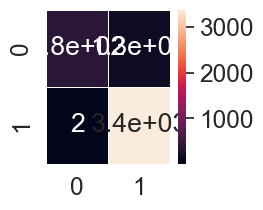

In [86]:
print('Accuracy of Training Data = ', accuracy_on_training_data)
print("Confusion Matrix:")
fig, ax = plt.subplots(figsize=(2,2))
sns.set(font_scale=1.6)
sns.heatmap(LogisticRegression_confusion_matrix, annot=True, linewidths=.5, ax=ax)

In [87]:
prediction_on_testing_data = model.predict(X_test_features)
accuracy_on_testing_data = accuracy_score(Y_test, prediction_on_testing_data)
LogisticRegression_confusion_matrix = confusion_matrix(Y_test, prediction_on_testing_data)

Accuracy of Testing Data =  0.9647129186602871


<Axes: >

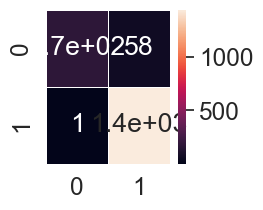

In [88]:
print('Accuracy of Testing Data = ', accuracy_on_testing_data)
fig, ax = plt.subplots(figsize=(2,2))
sns.set(font_scale=1.6)
sns.heatmap(LogisticRegression_confusion_matrix, annot=True, linewidths=.5, ax=ax)

# Train and evaluate the Naive Bayes classifier

In [36]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_features, Y_train)

MultinomialNB()

Accuracy of Training Data =  0.981025641025641


<Axes: >

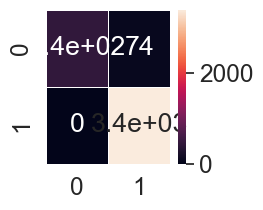

In [90]:
prediction_on_training_data = nb_classifier.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
nb_classifier_confusion_matrix = confusion_matrix(Y_train, prediction_on_training_data)


print('Accuracy of Training Data = ', accuracy_on_training_data)
fig, ax = plt.subplots(figsize=(2,2))
sns.set(font_scale=1.6)
sns.heatmap(nb_classifier_confusion_matrix, annot=True, linewidths=.5, ax=ax)

Accuracy of Testing Data =  0.9683014354066986


<Axes: >

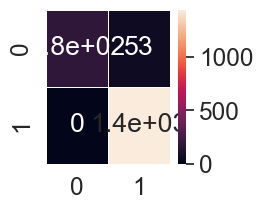

In [91]:
prediction_on_testing_data = nb_classifier.predict(X_test_features)
accuracy_on_testing_data = accuracy_score(Y_test, prediction_on_testing_data)
nb_classifier_confusion_matrix = confusion_matrix(Y_test, prediction_on_testing_data)


print('Accuracy of Testing Data = ', accuracy_on_testing_data)
fig, ax = plt.subplots(figsize=(2,2))
sns.set(font_scale=1.6)
sns.heatmap(nb_classifier_confusion_matrix, annot=True, linewidths=.5, ax=ax)

# Support Vector Machine (SVM)

In [92]:
svm_classifier = SVC()
svm_classifier.fit(X_train_features, Y_train)

SVC()

Accuracy of Training Data =  0.9982051282051282


<Axes: >

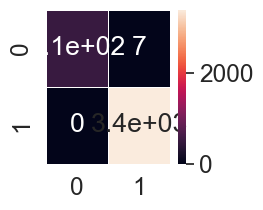

In [93]:
prediction_on_training_data = svm_classifier.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
svm_classifier_confusion_matrix = confusion_matrix(Y_train, prediction_on_training_data)


print('Accuracy of Training Data = ', accuracy_on_training_data)
fig, ax = plt.subplots(figsize=(2,2))
sns.set(font_scale=1.6)
sns.heatmap(svm_classifier_confusion_matrix, annot=True, linewidths=.5, ax=ax)

Accuracy of Testing Data =  0.9778708133971292


<Axes: >

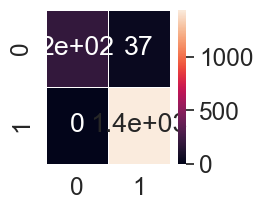

In [94]:
prediction_on_testing_data = svm_classifier.predict(X_test_features)
accuracy_on_testing_data = accuracy_score(Y_test, prediction_on_testing_data)
svm_classifier_confusion_matrix = confusion_matrix(Y_test, prediction_on_testing_data)


print('Accuracy of Testing Data = ', accuracy_on_testing_data)
fig, ax = plt.subplots(figsize=(2,2))
sns.set(font_scale=1.6)
sns.heatmap(svm_classifier_confusion_matrix, annot=True, linewidths=.5, ax=ax)